# Simultaneously fit multiple lightcurves 

Here we will fit multiple lightcurves simultaneously using the global fitter in exotic. We will set up bounds for each lightcurve that specify what parameters to fit along with 'global' bounds that are shared between all lightcurves. 

![](https://s3.amazonaws.com/aasie/images/0004-6256/164/5/null/ajac8deef3_hr.jpg)

This notebook will show you how to reproduce something similar to Figure 4 in a study on HD 80606 b, https://ui.adsabs.harvard.edu/abs/2022AJ....164..178P/abstract 

Please cite that paper if you use this code

## Find lightcurve data in the Exoplanet Watch Database

The command `get` will fetch priors, light curves and an ephemeris (O-C) for each target.

In [14]:
from exotic.api.ew import ExoplanetWatch
from IPython.display import display, Image

# This will load the results JSON from the link above
EW = ExoplanetWatch()
print(EW.target_list)

# names are case and space sensitive
# result = EW.get('WASP-1 b')
result = EW.get('HAT-P-32 b')

# list the result properties
result.__dict__.keys()

Loaded 300 targets
['CoRoT-11 b', 'CoRoT-14 b', 'CoRoT-18 b', 'CoRoT-1 b', 'CoRoT-27 b', 'CoRoT-29 b', 'CoRoT-2 b', 'CoRoT-5 b', 'CoRoT-7 b', 'CoRoT-8 b', 'CoRoTID 223977153 b', 'EPIC 206042996 c', 'Gaia-1 b', 'Gaia-2 b', 'GJ 1214 b', 'GJ 3470 b', 'GJ 436 b', 'GPX-1 b', 'HAT-P-11 b', 'HAT-P-12 b', 'HAT-P-13 b', 'HAT-P-16 b', 'HAT-P-17 b', 'HAT-P-18 b', 'HAT-P-19 b', 'HAT-P-1 b', 'HAT-P-20 b', 'HAT-P-21 b', 'HAT-P-22 b', 'HAT-P-23 b', 'HAT-P-25 b', 'HAT-P-26 b', 'HAT-P-27 b', 'HAT-P-28 b', 'HAT-P-29 b', 'HAT-P-30 b', 'HAT-P-32 b', 'HAT-P-33 b', 'HAT-P-36 b', 'HAT-P-37 b', 'HAT-P-39 b', 'HAT-P-3 b', 'HAT-P-41 b', 'HAT-P-44 b', 'HAT-P-45 b', 'HAT-P-49 b', 'HAT-P-4 b', 'HAT-P-50 b', 'HAT-P-51 b', 'HAT-P-52 b', 'HAT-P-53 b', 'HAT-P-54 b', 'HAT-P-55 b', 'HAT-P-56 b', 'HAT-P-57 b', 'HAT-P-59 b', 'HAT-P-5 b', 'HAT-P-68 b', 'HAT-P-6 b', 'HAT-P-70 b', 'HAT-P-7 b', 'HAT-P-8 b', 'HAT-P-9 b', 'HATS-18 b', 'HATS-22 b', 'HATS-24 b', 'HATS-2 b', 'HATS-33 b', 'HD 149026 b', 'HD 189733 b', 'HD 209458 b'

dict_keys(['raw_result', 'host', 'name', 'priors', 'timestamp', 'identifier', 'reduction_count', 'observation_count', 'ephemeris', 'observations'])

## Priors
A list of stellar and planetary parameters with references. These are used to calculate a light curve model with non-linear limb darkening.

In [15]:
result.priors

{'R*': {'units': 'Sol',
  'value': '1.22',
  'reference': 'Kokori%20et%20al.%202022',
  'uncertainty': '0.02'},
 'RA': {'units': 'decimal',
  'value': '31.0427614',
  'reference': None,
  'uncertainty': None},
 'Rp': {'units': 'R_Earth',
  'value': '22.19',
  'reference': 'Wang%20et%20al.%202019',
  'uncertainty': '0.5'},
 'T*': {'units': 'K',
  'value': '6207.0',
  'reference': 'Kokori%20et%20al.%202022',
  'uncertainty': '88.0'},
 'Tc': {'units': 'BJD-TDB',
  'value': '2456628.505625',
  'reference': 'Ivshina%20&amp;%20Winn%202022',
  'uncertainty': '7.1e-05'},
 'DEC': {'units': 'decimal',
  'value': '46.6878512',
  'reference': None,
  'uncertainty': None},
 'Tcs': [{'units': 'BJD, BJD-TDB',
   'value': '2454420.4465775',
   'reference': 'Bonomo%20et%20al.%202017,%20Zhao%20et%20al.%202014,%20Albrecht%20et%20al.%202012,%20Hartman%20et%20al.%202011',
   'uncertainty': '0.0002405'},
  {'units': 'HJD',
   'value': '2454942.898449',
   'reference': 'Gibson%20et%20al.%202013',
   'uncerta

In [16]:
result.ephemeris.keys()

dict_keys(['Tc', 'Tcs', 'files', 'notes', 'Period', 'Tc_err', 'epochs', 'Tcs_err', 'datasets', 'nea_tmids', 'residuals', 'timesaved', 'Period_err', 'nea_epochs', 'nea_tmids_err', 'nea_references', 'ephemeris_url'])

## Observations
A list of observations for each target. These are used to fit the light curve model to the data.

In [17]:
len(result.observations)

30

In [18]:
# list the properties
print(result.observations[0].__dict__.keys())

dict_keys(['raw_observation', 'name', 'files', 'filter', 'obscode', 'identifier', 'secondary_obscodes', 'errors', 'parameters', 'lightcurve_url', 'posterior_url'])


In [19]:
# print the best-fit parameters
result.observations[0].parameters

{'u0': 2.5572951033425317,
 'u1': -4.601284911007853,
 'u2': 4.718635289186434,
 'u3': -1.6746454815211127,
 'ecc': 0.159,
 'inc': 88.98,
 'omega': 50.0,
 'duration': 0.1284,
 'tmid': 2455942.6549,
 'a1': 1.0008,
 'a2': -0.0006,
 'ars': 5.415,
 'rprs': 0.146,
 'per': 2.1500079}

In [20]:
# show the light curve
#for i in range(len(result.observations)):
#    display(Image(url=result.observations[i].lightcurve_url))

# Download the light curve data

In [21]:
time, flux, fluxerr, airmass, airmasscorr = result.observations[0].get_data()

Text(0, 0.5, 'Rel. Flux')

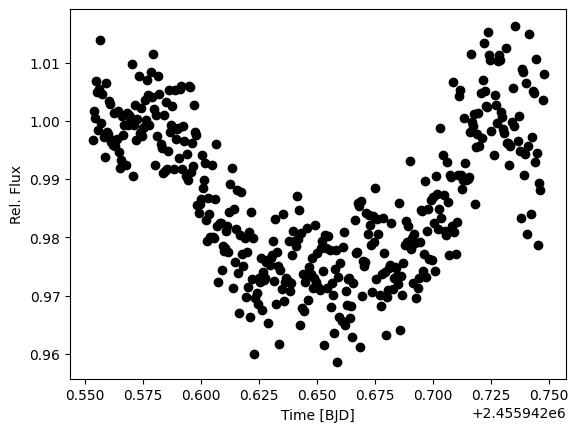

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(time, flux/airmasscorr, 'ko')
plt.xlabel("Time [BJD]")
plt.ylabel("Rel. Flux")

    Done!
Checking exotethys database...
Checking ephemerides database...
Checking photometry database...
Checking catalogues database...
    Done!
    Done!
	Updating:  ecc_planets.yaml
    Done!
	Updating:  ecc_stars.yaml
    Done!


Text(0, 0.5, 'Rel. Flux')

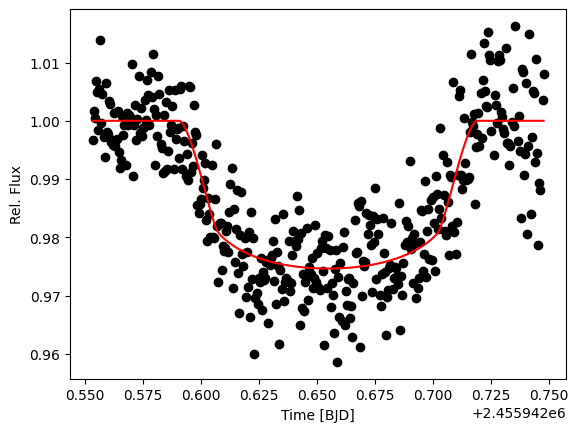

In [23]:
# let's over plot the transit model too
from exotic.api.elca import transit

plt.plot(time, flux/airmasscorr, 'ko')
plt.plot(time, transit(time, result.observations[0].parameters), 'r-')
plt.xlabel("Time [BJD]")
plt.ylabel("Rel. Flux")

## Fit a single lightcurve using EXOTIC

In [24]:
from exotic.api.elca import lc_fitter

# only define bounds for the "free" parameters during fitting
mybounds = {
    # [lower, upper]
    'rprs':[0,0.2],
    'tmid':[ result.ephemeris['Tc']-0.02,
             result.ephemeris['Tc']+0.02],
    'a2':[-0.5,0.5] # airmass curvature
}

myfit = lc_fitter(time, flux, fluxerr, airmass,
                  result.observations[0].parameters, # priors
                  mybounds, mode='ns' )  # ns = nested sampling, slow but robust + posteriors
                                         # lm = levenberg mardquart, fast but no uncertainties

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-2e+02  .80 [-170.9108..-170.9101]*| it/evals=6816/14262 eff=49.1704% N=400 0 0   
[ultranest] Likelihood function evaluations: 14276
[ultranest]   logZ = -183.3 +- 0.1288
[ultranest] Effective samples strategy satisfied (ESS = 1819.3, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)
[ultranest]   logZ error budget: single: 0.17 bs:0.13 tail:0.01 total:0.13 required:<0.50
[ultranest] done iterating.


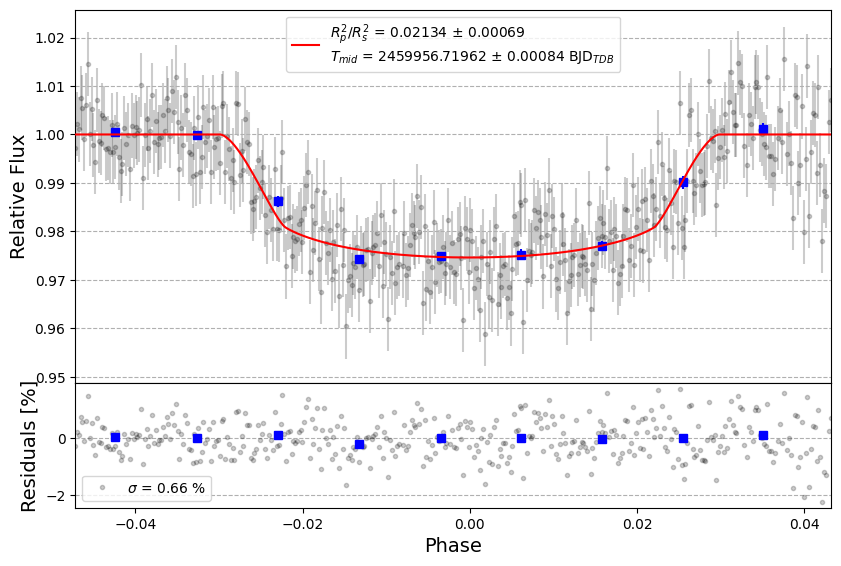

In [25]:
myfit.plot_bestfit()
plt.show()

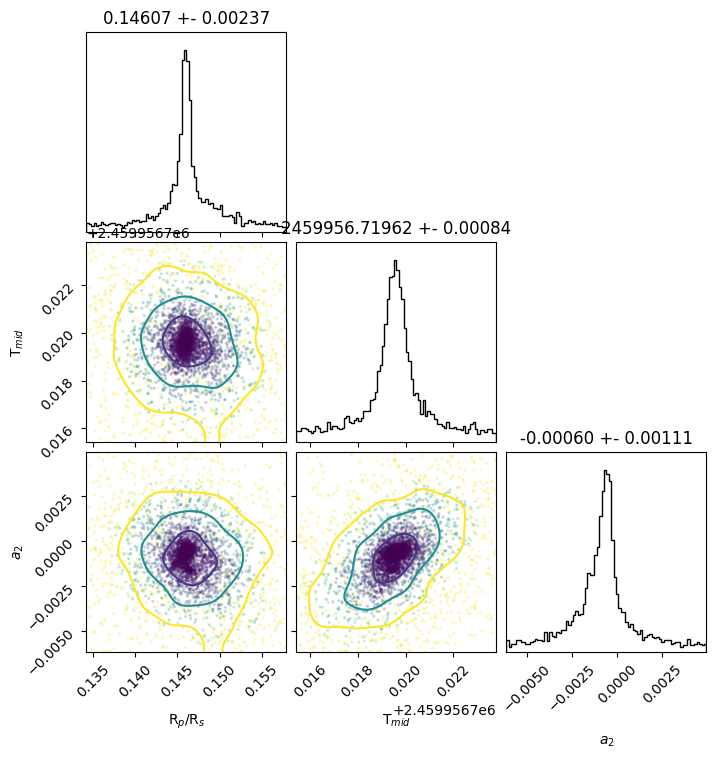

In [26]:
# show the posterior distributions
myfit.plot_triangle()
plt.show()

# Fit multiple light curves

After each light curve is fit, the mid-transit times are used along with values from the NASA Exoplanet Archive to derive a phase-folded fit with every dataset

In [50]:
from astropy.time import Time
from copy import deepcopy

# prep data for global fitter
input_data = []

# free parameters for each light curve
local_bounds = []

# copy default priors
prior = deepcopy(result.observations[0].parameters)

# aavso files on EW
for n,obs in enumerate(result.observations):

    try:
        time, flux, fluxerr, airmass, airmasscorr = obs.get_data()
    except:
        try:
            time, flux, fluxerr, airmass = obs.get_data()
        except:
            time, flux, fluxerr, airmass, dummy1, dummy2 = obs.get_data()

    # ignore noisy data
    if np.std(flux) > 0.03:
        continue
    else:
        prior = deepcopy(result.observations[n].parameters)

        # add data to list
        input_data.append({
            'time':time,
            'flux':flux,
            'ferr':fluxerr,
            'airmass':airmass,
            'priors':prior,
            'name':f"{obs.obscode['id']}"
        })

        # set parameters to ephemeris
        input_data[-1]['priors']['per'] = result.ephemeris['Period']
        input_data[-1]['priors']['tmid'] = result.ephemeris['Tc']

    # add parameter for individual airmass detrending
    local_bounds.append({'a2':(-0.75,0.75)}) 
    # bounds will get overwritten by setting "individual_fit" flag in global fitter

    # print some timing info
    mint = Time(input_data[-1]['time'].min(),format='jd').isot
    maxt = Time(input_data[-1]['time'].max(),format='jd').isot
    maxphase = (input_data[-1]['time'].max() - prior['tmid'])/prior['per']
    minphase = (input_data[-1]['time'].min() - prior['tmid'])/prior['per']
    print(f"{input_data[-1]['name']} {len(input_data)} : {mint} ({minphase:.4f}) - {maxt} ({maxphase:.4f})")

ZDAB 1 : 2012-01-16T01:16:55.379 (-1867.0462) - 2012-01-16T05:56:45.035 (-1866.9558)
NANF 2 : 2017-12-20T01:40:35.687 (-860.0658) - 2017-12-20T08:43:02.923 (-859.9293)
FMAA 3 : 2018-11-29T02:38:32.433 (-700.0477) - 2018-11-29T07:47:25.149 (-699.9479)
FMAA 4 : 2019-09-13T05:08:49.888 (-566.0462) - 2019-09-13T10:08:50.284 (-565.9493)
FMAA 5 : 2020-09-19T03:49:17.259 (-393.0493) - 2020-09-19T08:57:27.461 (-392.9497)
PJEF 6 : 2020-10-12T18:58:11.078 (-382.0581) - 2020-10-13T00:20:06.230 (-381.9541)
FMAA 7 : 2020-10-17T02:36:44.351 (-380.0495) - 2020-10-17T07:47:23.487 (-379.9492)
FMAA 8 : 2021-01-11T02:37:55.217 (-340.0493) - 2021-01-11T07:46:49.746 (-339.9495)
FMAA 9 : 2020-11-16T05:00:27.947 (-366.0496) - 2020-11-16T10:08:53.460 (-365.9500)
FMAA 10 : 2020-11-29T02:35:34.807 (-360.0499) - 2020-11-29T07:44:27.458 (-359.9502)
FMAA 11 : 2020-12-14T03:49:32.964 (-353.0493) - 2020-12-14T08:58:28.340 (-352.9496)
FMAA 12 : 2020-12-27T01:26:04.580 (-347.0492) - 2020-12-27T06:33:23.168 (-346.9499)

In [51]:
import glob
from pylightcurve import exotethys

# generate limb darkening coefficients for TESS
get_prior = lambda key: float(result.priors[key]['value'])
u0,u1,u2,u3 = exotethys(get_prior('LOGG'), get_prior('T*'), get_prior('FE/H'), 'TESS', method='claret', stellar_model='phoenix')

# get files from local directory
tess_lightcurves = glob.glob('wasp1b*.txt')
print(tess_lightcurves)

# add TESS data
for n,lc in enumerate(tess_lightcurves):

        # read in data
        time, flux, fluxerr, airmass, airmasscorr = np.loadtxt(lc, unpack=True, delimiter=',')
        prior = deepcopy(result.observations[0].parameters)
        prior['u0'] = u0
        prior['u1'] = u1
        prior['u2'] = u2
        prior['u3'] = u3
        prior['tmid'] = result.ephemeris['Tc']
        prior['per'] = result.ephemeris['Period']
        prior['a2'] = 0.0
        
        # add data to list
        input_data.append({
            'time':time,
            'flux':flux,
            'ferr':fluxerr,
            'airmass':np.zeros(time.shape),
            'priors':prior,
            'name':f"TESS"
        })
    
        # no airmass detrending
        local_bounds.append({})

        # print some timing info
        mint = Time(input_data[-1]['time'].min(),format='jd').isot
        maxt = Time(input_data[-1]['time'].max(),format='jd').isot
        maxphase = (input_data[-1]['time'].max() - prior['tmid'])/prior['per']
        minphase = (input_data[-1]['time'].min() - prior['tmid'])/prior['per']
        print(f"{input_data[-1]['name']} {len(input_data)} : {mint} ({minphase:.4f}) - {maxt} ({maxphase:.4f})")

PHOENIX models are only computed for solar metallicity stars. Setting stellar_metallicity = 0.
[]


In [ ]:
from exotic.api.elca import glc_fitter

# bounds shared by all light curves
global_bounds = {
    'rprs':(prior['rprs']*0.75, prior['rprs']*1.33),
    'inc':(prior['inc']-3, min(90,prior['inc']+3)),
    'per':( result.ephemeris['Period']-0.001, 
            result.ephemeris['Period']+0.001),
    'tmid':( result.ephemeris['Tc']-0.02,
             result.ephemeris['Tc']+0.02),
}

global_fit = glc_fitter(input_data, global_bounds, local_bounds, individual_fit=True, verbose=True)

Fitting individual light curve 1/29
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-2e+02  .80 [-170.9299..-170.9297]*| it/evals=6760/13663 eff=50.9689% N=400   0  0 
[ultranest] Likelihood function evaluations: 13666
[ultranest]   logZ = -183.2 +- 0.1191
[ultranest] Effective samples strategy satisfied (ESS = 1930.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.12, need <0.5)
[ultranest]   logZ error budget: single: 0.16 bs:0.12 tail:0.01 total:0.12 required:<0.50
[ultranest] done iterating.
ZDAB & 2455942.55341874 & 2455942.74774346 & 0.0065153780876894465 & 410
Fitting individual light curve 2/29
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-7e+01   [-67.1945..-67.1943]*| it/evals=6030/13621 eff=45.6093% N=400        0  
[ultranest] Likelihood function evaluations: 13634
[ultranest]   logZ = -77.66 +- 0.1107
[ultranest] Effective samples strategy satisfied (ESS = 1823.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.15 bs:0.11 tail:0.01 total:0.11 required:<0.50
[ultranest] done iterating.
NANF & 2458107.56985749 & 2458107.86322827 & 0.005319972419416692 & 141
Fitting individual light curve 3/29
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-5e+01   [-50.2365..-50.2364]*| it/evals=5120/9284 eff=57.6317% N=400     
[ultranest] Likelihood function evaluations: 9295
[ultranest]   logZ = -58.41 +- 0.08339
[ultranest] Effective samples strategy satisfied (ESS = 1931.3, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.09 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.08, need <0.5)
[ultranest]   logZ error budget: single: 0.13 bs:0.08 tail:0.01 total:0.08 required:<0.50
[ultranest] done iterating.
FMAA & 2458451.6100976 & 2458451.82459663 & 0.006614563414002086 & 103
Fitting individual light curve 4/29
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-7e+01   [-73.8135..-73.8134]*| it/evals=6080/11394 eff=55.3029% N=400   0 0   
[ultranest] Likelihood function evaluations: 11430
[ultranest]   logZ = -84.39 +- 0.1023
[ultranest] Effective samples strategy satisfied (ESS = 1867.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.10, need <0.5)
[ultranest]   logZ error budget: single: 0.15 bs:0.10 tail:0.01 total:0.10 required:<0.50
[ultranest] done iterating.
FMAA & 2458739.7144663 & 2458739.92280421 & 0.006945359445285461 & 89
Fitting individual light curve 5/29
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-5e+01   [-47.8562..-47.8562]*| it/evals=5800/10841 eff=55.5502% N=400        0 
[ultranest] Likelihood function evaluations: 10924
[ultranest]   logZ = -57.82 +- 0.09364
[ultranest] Effective samples strategy satisfied (ESS = 1953.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.09, need <0.5)
[ultranest]   logZ error budget: single: 0.14 bs:0.09 tail:0.01 total:0.09 required:<0.50
[ultranest] done iterating.
FMAA & 2459111.65922753 & 2459111.8732345 & 0.008291066648781589 & 101
Fitting individual light curve 6/29
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-2e+02  .54 [-192.8050..-192.8049]*| it/evals=7920/21827 eff=36.9627% N=400         
[ultranest] Likelihood function evaluations: 21849
[ultranest]   logZ = -207.9 +- 0.144
[ultranest] Effective samples strategy satisfied (ESS = 2125.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.14, need <0.5)
[ultranest]   logZ error budget: single: 0.18 bs:0.14 tail:0.01 total:0.14 required:<0.50
[ultranest] done iterating.
PJEF & 2459135.290406 & 2459135.513961 & 0.0028274747496078866 & 91
Fitting individual light curve 7/29
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-2e+01   [-15.6846..-15.6842]*| it/evals=4440/8562 eff=54.3984% N=400     
[ultranest] Likelihood function evaluations: 8568
[ultranest]   logZ = -22.14 +- 0.09265
[ultranest] Effective samples strategy satisfied (ESS = 1772.3, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.09, need <0.5)
[ultranest]   logZ error budget: single: 0.11 bs:0.09 tail:0.01 total:0.09 required:<0.50
[ultranest] done iterating.
FMAA & 2459139.60884665 & 2459139.8245774 & 0.009003213623168766 & 104
Fitting individual light curve 8/29
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-3e+01   [-29.6522..-29.6521]*| it/evals=5640/10083 eff=58.2464% N=400     0   
[ultranest] Likelihood function evaluations: 10139
[ultranest]   logZ = -39.16 +- 0.1139
[ultranest] Effective samples strategy satisfied (ESS = 1898.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.14 bs:0.11 tail:0.01 total:0.11 required:<0.50
[ultranest] done iterating.
FMAA & 2459225.60966686 & 2459225.82418687 & 0.006529301262071957 & 103
Fitting individual light curve 9/29
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-1e+01   [-14.6054..-14.6053]*| it/evals=4560/9153 eff=52.0964% N=400   0 
[ultranest] Likelihood function evaluations: 9205
[ultranest]   logZ = -21.39 +- 0.07722
[ultranest] Effective samples strategy satisfied (ESS = 1821.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.05 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.08, need <0.5)
[ultranest]   logZ error budget: single: 0.12 bs:0.08 tail:0.01 total:0.08 required:<0.50
[ultranest] done iterating.
FMAA & 2459169.70865679 & 2459169.92284097 & 0.0034956293933783287 & 101
Fitting individual light curve 10/29
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-1e+01   [-11.9181..-11.9180]*| it/evals=3780/7331 eff=54.5376% N=400 
[ultranest] Likelihood function evaluations: 7333
[ultranest]   logZ = -16.73 +- 0.07204
[ultranest] Effective samples strategy satisfied (ESS = 1805.8, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.07, need <0.5)
[ultranest]   logZ error budget: single: 0.09 bs:0.07 tail:0.01 total:0.07 required:<0.50
[ultranest] done iterating.
FMAA & 2459182.60804175 & 2459182.82254002 & 0.0022676965647036003 & 102
Fitting individual light curve 11/29
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-4e+01   [-36.3652..-36.3652]*| it/evals=5780/11370 eff=52.6892% N=400   0  0 
[ultranest] Likelihood function evaluations: 11405
[ultranest]   logZ = -46.21 +- 0.09786
[ultranest] Effective samples strategy satisfied (ESS = 1848.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.10, need <0.5)
[ultranest]   logZ error budget: single: 0.15 bs:0.10 tail:0.01 total:0.10 required:<0.50
[ultranest] done iterating.
FMAA & 2459197.6594093 & 2459197.87393912 & 0.0059518995547027855 & 99
Fitting individual light curve 12/29
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-4e+01   [-40.4334..-40.4332]*| it/evals=5480/10810 eff=52.6417% N=400    
[ultranest] Likelihood function evaluations: 10848
[ultranest]   logZ = -49.53 +- 0.106
[ultranest] Effective samples strategy satisfied (ESS = 1976.1, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.14 bs:0.11 tail:0.01 total:0.11 required:<0.50
[ultranest] done iterating.
FMAA & 2459210.55977523 & 2459210.77318482 & 0.008387073442544184 & 103
Fitting individual light curve 13/29
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-2e+02  .38 [-159.5328..-159.5328]*| it/evals=6480/13714 eff=48.6706% N=400   00  
[ultranest] Likelihood function evaluations: 13764
[ultranest]   logZ = -171.1 +- 0.1054
[ultranest] Effective samples strategy satisfied (ESS = 1889.5, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.16 bs:0.11 tail:0.01 total:0.11 required:<0.50
[ultranest] done iterating.
KADB & 2459253.582891 & 2459253.725878 & 0.0054401462614219595 & 69
Fitting individual light curve 14/29
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-5e+01   [-52.3210..-52.3207]*| it/evals=5160/10085 eff=53.2783% N=400   0  0 
[ultranest] Likelihood function evaluations: 10124
[ultranest]   logZ = -60.64 +- 0.1001
[ultranest] Effective samples strategy satisfied (ESS = 1984.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.10, need <0.5)
[ultranest]   logZ error budget: single: 0.13 bs:0.10 tail:0.01 total:0.10 required:<0.50
[ultranest] done iterating.
SNIC & 2459423.44247562 & 2459423.59026555 & 0.009923152165898492 & 127
Fitting individual light curve 15/29
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-2e+02  .73 [-173.8785..-173.8783]*| it/evals=6520/12848 eff=52.3779% N=400   0  0 
[ultranest] Likelihood function evaluations: 12888
[ultranest]   logZ = -185.5 +- 0.1123
[ultranest] Effective samples strategy satisfied (ESS = 1890.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.09 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.16 bs:0.11 tail:0.01 total:0.11 required:<0.50
[ultranest] done iterating.
ASUB & 2459440.59672026 & 2459440.83489988 & 0.009354747348972008 & 438
Fitting individual light curve 16/29
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-4e+02  .25 [-389.3417..-389.3414]*| it/evals=6800/12418 eff=56.5818% N=400     
[ultranest] Likelihood function evaluations: 12421
[ultranest]   logZ = -401.7 +- 0.1332
[ultranest] Effective samples strategy satisfied (ESS = 1919.1, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)
[ultranest]   logZ error budget: single: 0.16 bs:0.13 tail:0.01 total:0.13 required:<0.50
[ultranest] done iterating.
KADB & 2459500.810523 & 2459500.98853 & 0.007553728194097562 & 87
Fitting individual light curve 17/29
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-2e+01   [-23.4644..-23.4642]*| it/evals=4668/8640 eff=56.6505% N=400   0 
[ultranest] Likelihood function evaluations: 8642
[ultranest]   logZ = -30.48 +- 0.09446
[ultranest] Effective samples strategy satisfied (ESS = 1863.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.09, need <0.5)
[ultranest]   logZ error budget: single: 0.12 bs:0.09 tail:0.01 total:0.09 required:<0.50
[ultranest] done iterating.
FMAA & 2459526.61128839 & 2459526.82489734 & 0.009870446176612558 & 98
Fitting individual light curve 18/29
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-2e+02  .01 [-241.1879..-241.1876]*| it/evals=6800/15661 eff=44.5580% N=400     
[ultranest] Likelihood function evaluations: 15686
[ultranest]   logZ = -253.6 +- 0.1331
[ultranest] Effective samples strategy satisfied (ESS = 2181.3, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)
[ultranest]   logZ error budget: single: 0.16 bs:0.13 tail:0.01 total:0.13 required:<0.50
[ultranest] done iterating.
KADB & 2459526.616997 & 2459526.824997 & 0.007728261915994505 & 98
Fitting individual light curve 19/29
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-3e+01   [-30.1910..-30.1909]*| it/evals=4590/8788 eff=54.7210% N=400  
[ultranest] Likelihood function evaluations: 8800
[ultranest]   logZ = -37.08 +- 0.09623
[ultranest] Effective samples strategy satisfied (ESS = 1861.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.10, need <0.5)
[ultranest]   logZ error budget: single: 0.12 bs:0.10 tail:0.01 total:0.10 required:<0.50
[ultranest] done iterating.
FMAA & 2459528.76034569 & 2459528.85404916 & 0.0067473948182962575 & 45
Fitting individual light curve 20/29
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-5e+02  .99 [-481.0412..-481.0411]*| it/evals=6440/11467 eff=58.1910% N=400  0 
[ultranest] Likelihood function evaluations: 11506
[ultranest]   logZ = -492.5 +- 0.1327
[ultranest] Effective samples strategy satisfied (ESS = 1920.8, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)
[ultranest]   logZ error budget: single: 0.16 bs:0.13 tail:0.01 total:0.13 required:<0.50
[ultranest] done iterating.
KADB & 2459554.560419 & 2459554.77441 & 0.007937641112090594 & 104
Fitting individual light curve 21/29
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-4e+01   [-39.7636..-39.7635]*| it/evals=5040/11600 eff=45.0000% N=400   
[ultranest] Likelihood function evaluations: 11629
[ultranest]   logZ = -47.76 +- 0.09822
[ultranest] Effective samples strategy satisfied (ESS = 1928.0, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.11 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.10, need <0.5)
[ultranest]   logZ error budget: single: 0.13 bs:0.10 tail:0.01 total:0.10 required:<0.50
[ultranest] done iterating.
FMAA & 2459554.56076426 & 2459554.77431023 & 0.008206043455050358 & 103
Fitting individual light curve 22/29
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-1e+02  .69 [-134.8502..-134.8497]*| it/evals=6680/13829 eff=49.7431% N=400  0 
[ultranest] Likelihood function evaluations: 13884
[ultranest]   logZ = -147 +- 0.08276
[ultranest] Effective samples strategy satisfied (ESS = 2086.8, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.08, need <0.5)
[ultranest]   logZ error budget: single: 0.16 bs:0.08 tail:0.01 total:0.08 required:<0.50
[ultranest] done iterating.
KADB & 2459569.608669 & 2459569.825656 & 0.009159144205246732 & 84
Fitting individual light curve 23/29
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-4e+01   [-37.5268..-37.5267]*| it/evals=4800/9778 eff=51.1836% N=400   
[ultranest] Likelihood function evaluations: 9850
[ultranest]   logZ = -44.92 +- 0.07667
[ultranest] Effective samples strategy satisfied (ESS = 1997.0, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.47+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.08, need <0.5)
[ultranest]   logZ error budget: single: 0.12 bs:0.08 tail:0.01 total:0.08 required:<0.50
[ultranest] done iterating.
KMUA & 2459844.81096132 & 2459845.00049161 & 0.009408924141271868 & 74
Fitting individual light curve 24/29
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-2e+01   [-19.5735..-19.5735]*| it/evals=4320/8229 eff=55.1795% N=400   
[ultranest] Likelihood function evaluations: 8255
[ultranest]   logZ = -25.78 +- 0.09084
[ultranest] Effective samples strategy satisfied (ESS = 1834.4, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.09, need <0.5)
[ultranest]   logZ error budget: single: 0.11 bs:0.09 tail:0.01 total:0.09 required:<0.50
[ultranest] done iterating.
PJEG & 2459870.70734314 & 2459870.83636975 & 0.008132500368447749 & 37
Fitting individual light curve 25/29
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-5e+01   [-48.4437..-48.4435]*| it/evals=5360/10881 eff=51.1402% N=400    
[ultranest] Likelihood function evaluations: 10890
[ultranest]   logZ = -57.22 +- 0.08033
[ultranest] Effective samples strategy satisfied (ESS = 1850.9, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.08, need <0.5)
[ultranest]   logZ error budget: single: 0.14 bs:0.08 tail:0.01 total:0.08 required:<0.50
[ultranest] done iterating.
OAS & 2459885.66319444 & 2459885.87488809 & 0.004921688665700539 & 101
Fitting individual light curve 26/29
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-5e+01   [-49.7940..-49.7939]*| it/evals=5560/10319 eff=56.0540% N=400     
[ultranest] Likelihood function evaluations: 10361
[ultranest]   logZ = -59.08 +- 0.1101
[ultranest] Effective samples strategy satisfied (ESS = 1891.1, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.14 bs:0.11 tail:0.01 total:0.11 required:<0.50
[ultranest] done iterating.
OAS & 2459913.61211229 & 2459913.82455252 & 0.004365884333753524 & 103
Fitting individual light curve 27/29
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-5e+01   [-54.0887..-54.0884]*| it/evals=5800/12575 eff=47.6386% N=400   0  0 
[ultranest] Likelihood function evaluations: 12592
[ultranest]   logZ = -63.96 +- 0.09995
[ultranest] Effective samples strategy satisfied (ESS = 1876.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.09 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.10, need <0.5)
[ultranest]   logZ error budget: single: 0.14 bs:0.10 tail:0.01 total:0.10 required:<0.50
[ultranest] done iterating.
FMAA & 2459928.66143617 & 2459928.87599733 & 0.007423180354873883 & 103
Fitting individual light curve 28/29
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-2e+02  .32 [-158.3950..-158.3949]*| it/evals=7440/13221 eff=58.0298% N=400   0  
[ultranest] Likelihood function evaluations: 13249
[ultranest]   logZ = -172.4 +- 0.09188
[ultranest] Effective samples strategy satisfied (ESS = 1911.1, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.09, need <0.5)
[ultranest]   logZ error budget: single: 0.18 bs:0.09 tail:0.01 total:0.09 required:<0.50
[ultranest] done iterating.
SAJB & 2459937.256321 & 2459937.482601 & 0.0020872489852802084 & 232
Fitting individual light curve 29/29
[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-2e+01   [-21.2994..-21.2994]*| it/evals=4320/8117 eff=55.9803% N=400  0   
[ultranest] Likelihood function evaluations: 8178
[ultranest]   logZ = -27.54 +- 0.07385
[ultranest] Effective samples strategy satisfied (ESS = 1822.6, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.08 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.07, need <0.5)
[ultranest]   logZ error budget: single: 0.11 bs:0.07 tail:0.01 total:0.07 required:<0.50
[ultranest] done iterating.
OAS & 2459956.61166393 & 2459956.83034668 & 0.019306470186350202 & 97
[ultranest] Sampling 400 live points from prior ...


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ultranest/integrator.py:1756: UserWarning: Sampling from region seems inefficient (0/40 accepted in iteration 2500). To improve efficiency, modify the transformation so that the current live points are ellipsoidal, or use a stepsampler, or set frac_remain to a lower number (e.g., 0.5) to terminate earlier.
  warnings.warn(warning_message)


In [ ]:
global_fit.plot_triangle()
plt.savefig("posteriors.png",facecolor='white')

In [ ]:
global_fit.plot_bestfit(alpha=0.025, bin_dt = 15./60/24, title="WASP-1 b Global Fit",phase_limits='median')
plt.savefig("bestfit.png",facecolor='white')

In [ ]:
global_fit.plot_bestfits()
plt.savefig("bestfits.png",facecolor='white')
#myfit.plot_stack(dy=0.03)
#plt.savefig("stackfit.png",facecolor='white')

In [ ]:
# best-fit parameters from global fit
global_fit.parameters.keys()

In [ ]:
# compare global ephemeris to values from EW
result.ephemeris.keys()

In [ ]:
result.ephemeris['nea_tmids']

In [ ]:
from exotic.api.nested_linear_fitter import linear_fitter

# min and max values to search between for fitting the ephemeris
bounds = {
    'm':[ # orbital period
        global_fit.parameters['per']-5*global_fit.errors['per'], 
        global_fit.parameters['per']+5*global_fit.errors['per']
    ], 
    'b':[ # mid-transit time
        global_fit.parameters['tmid']-5*global_fit.errors['tmid'],
        global_fit.parameters['tmid']+5*global_fit.errors['tmid']
    ] 
}

# used to plot red overlay in O-C figure
prior = {
    'm':[global_fit.parameters['per'], global_fit.errors['per']],   # value from global
    'b':[global_fit.parameters['tmid'], global_fit.errors['tmid']]  # value from WLS
}

In [ ]:
# combine the good data from Exoplanet Watch and NASA Exoplanet Archive
Tcs = np.array(result.ephemeris['Tcs'] + result.ephemeris['nea_tmids'], dtype=float)
Tcs_err = np.array(result.ephemeris['Tcs_err'] + result.ephemeris['nea_tmids_err'], dtype=float)

# fit the data and compare ephemeris to global light curve fit
lf = linear_fitter( Tcs, Tcs_err, bounds, prior=prior )

In [ ]:
lf.plot_triangle()
plt.subplots_adjust(top=0.9,hspace=0.2,wspace=0.2)
plt.savefig("posterior.png",facecolor='white')
plt.close()
print("image saved to: posterior.png")
Image("posterior.png")

In [ ]:
fig,ax = lf.plot_oc()
plt.tight_layout()
plt.savefig("oc.png",facecolor='white')
plt.close()
Image("oc.png")

In [ ]:
# combine the good data from Exoplanet Watch and NASA Exoplanet Archive
Tcs = np.array(result.ephemeris['Tcs'] + result.ephemeris['nea_tmids'], dtype=float)
Tcs_err = np.array(result.ephemeris['Tcs_err'] + result.ephemeris['nea_tmids_err'], dtype=float)

# fit the data and compare ephemeris to global light curve fit
lf = linear_fitter( Tcs, Tcs_err, bounds, prior=prior )

In [ ]:
# look at data from individual light curves in global fit
tmids = [lcfit['individual']['tmid'] for lcfit in global_fit.lc_data]
tmids_err = [lcfit['individual_err']['tmid'] for lcfit in global_fit.lc_data]
res_stdev = [lcfit['res_stdev'] for lcfit in global_fit.lc_data]
rprs2 = [lcfit['individual']['rprs']**2 for lcfit in global_fit.lc_data]
rprs = [lcfit['individual']['rprs'] for lcfit in global_fit.lc_data]
rprs_err = [lcfit['individual_err']['rprs'] for lcfit in global_fit.lc_data]
name = [lcfit['name'] for lcfit in global_fit.lc_data]

# filter bad data
mask = (res_stdev < np.mean(rprs2)) & (np.mean(rprs) > 5 * np.mean(rprs_err))
# filter based on quality? 

tmids = np.array(tmids)[mask]
tmids_err = np.array(tmids_err)[mask]

# combine with nea data
tmids = np.array(list(tmids) + result.ephemeris['nea_tmids'], dtype=float)
tmids_err = np.array(list(tmids_err) + result.ephemeris['nea_tmids_err'], dtype=float)

# fit the data and compare ephemeris to global light curve fit
lf = linear_fitter( tmids, tmids_err, bounds, prior=prior )

fig,ax = lf.plot_oc()
plt.tight_layout()
plt.savefig("oc_global.png",facecolor='white')
plt.close()
Image("oc_global.png")

In [ ]:
fig,ax = lf.plot_periodogram()
plt.tight_layout()
plt.savefig("plot_periodogram.png",facecolor='white')
plt.close()
Image("plot_periodogram.png")